Using the `nycflights13` package/data, which three airlines performed the most flights in 2013.

Hints:  
- The `airlines` table provides the name of each airline
- Each row in the `flights` table represents one flight
- Use `group_by`, `summarize`,  and `arrange` 

In [2]:
library(tidyverse)
library(nycflights13)

In [9]:
df_flight = flights  %>% 
    group_by(carrier)  %>% 
    count()  %>% 
    ungroup()  %>% 
    left_join(airlines)  %>% 
    arrange(n)  %>% 
    mutate(name = fct_inorder(name))

df_flight  %>%  head

Joining, by = "carrier"



carrier,n,name
<chr>,<int>,<fct>
OO,32,SkyWest Airlines Inc.
HA,342,Hawaiian Airlines Inc.
YV,601,Mesa Airlines Inc.
F9,685,Frontier Airlines Inc.
AS,714,Alaska Airlines Inc.
FL,3260,AirTran Airways Corporation


In [10]:
df_flight  %>% pull(name)  %>%  levels

[1] "SkyWest Airlines Inc."       "Hawaiian Airlines Inc."     
 [3] "Mesa Airlines Inc."          "Frontier Airlines Inc."     
 [5] "Alaska Airlines Inc."        "AirTran Airways Corporation"
 [7] "Virgin America"              "Southwest Airlines Co."     
 [9] "Endeavor Air Inc."           "US Airways Inc."            
[11] "Envoy Air"                   "American Airlines Inc."     
[13] "Delta Air Lines Inc."        "ExpressJet Airlines Inc."   
[15] "JetBlue Airways"             "United Air Lines Inc."

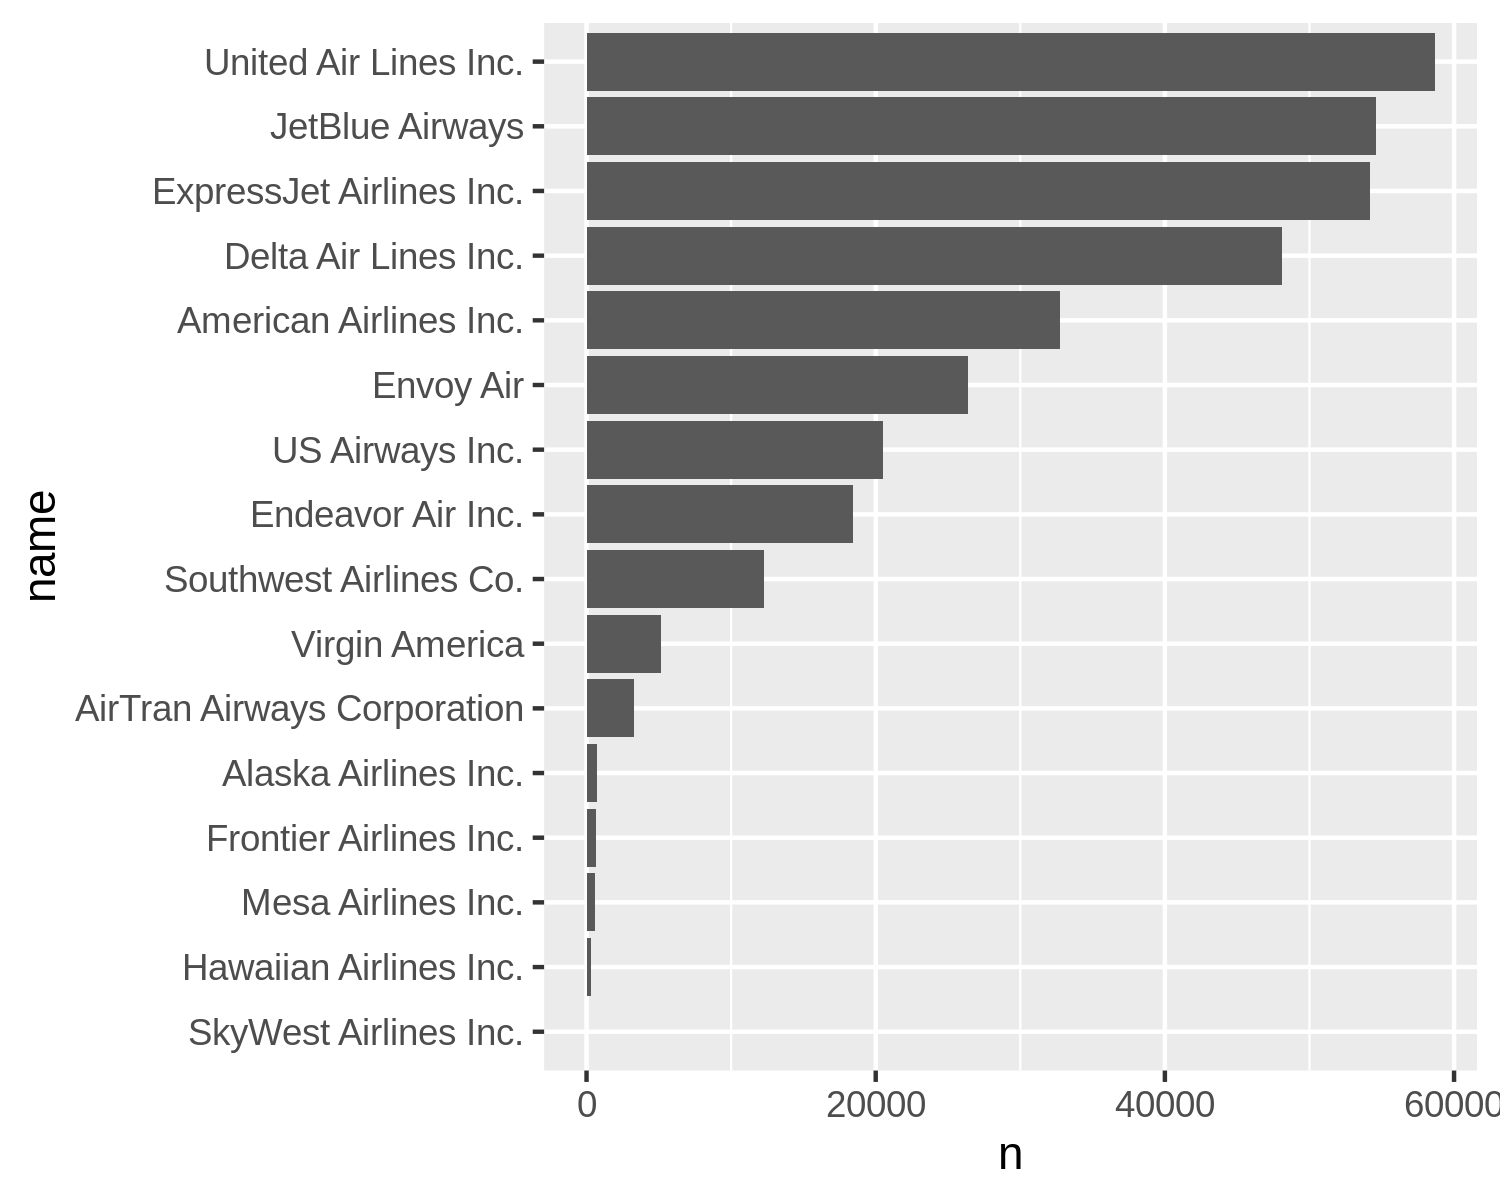

In [13]:
p = ggplot(df_flight, aes(x = n, y = name))

p = p + geom_col()

p

Re-create the following figure:

(*Hint: use* `forcats` *to lump and reorder by number of flights*)

<img src="figs/flights_bar.png" style="width: 600px;"/>

In [26]:
df_flights_sorted = flights  %>% 
    left_join(airlines)  %>% 
    mutate(name = name  %>%  fct_lump(n = 10)  %>% fct_infreq()  %>% fct_relevel('Other', after = Inf)  %>% fct_rev())  


Joining, by = "carrier"



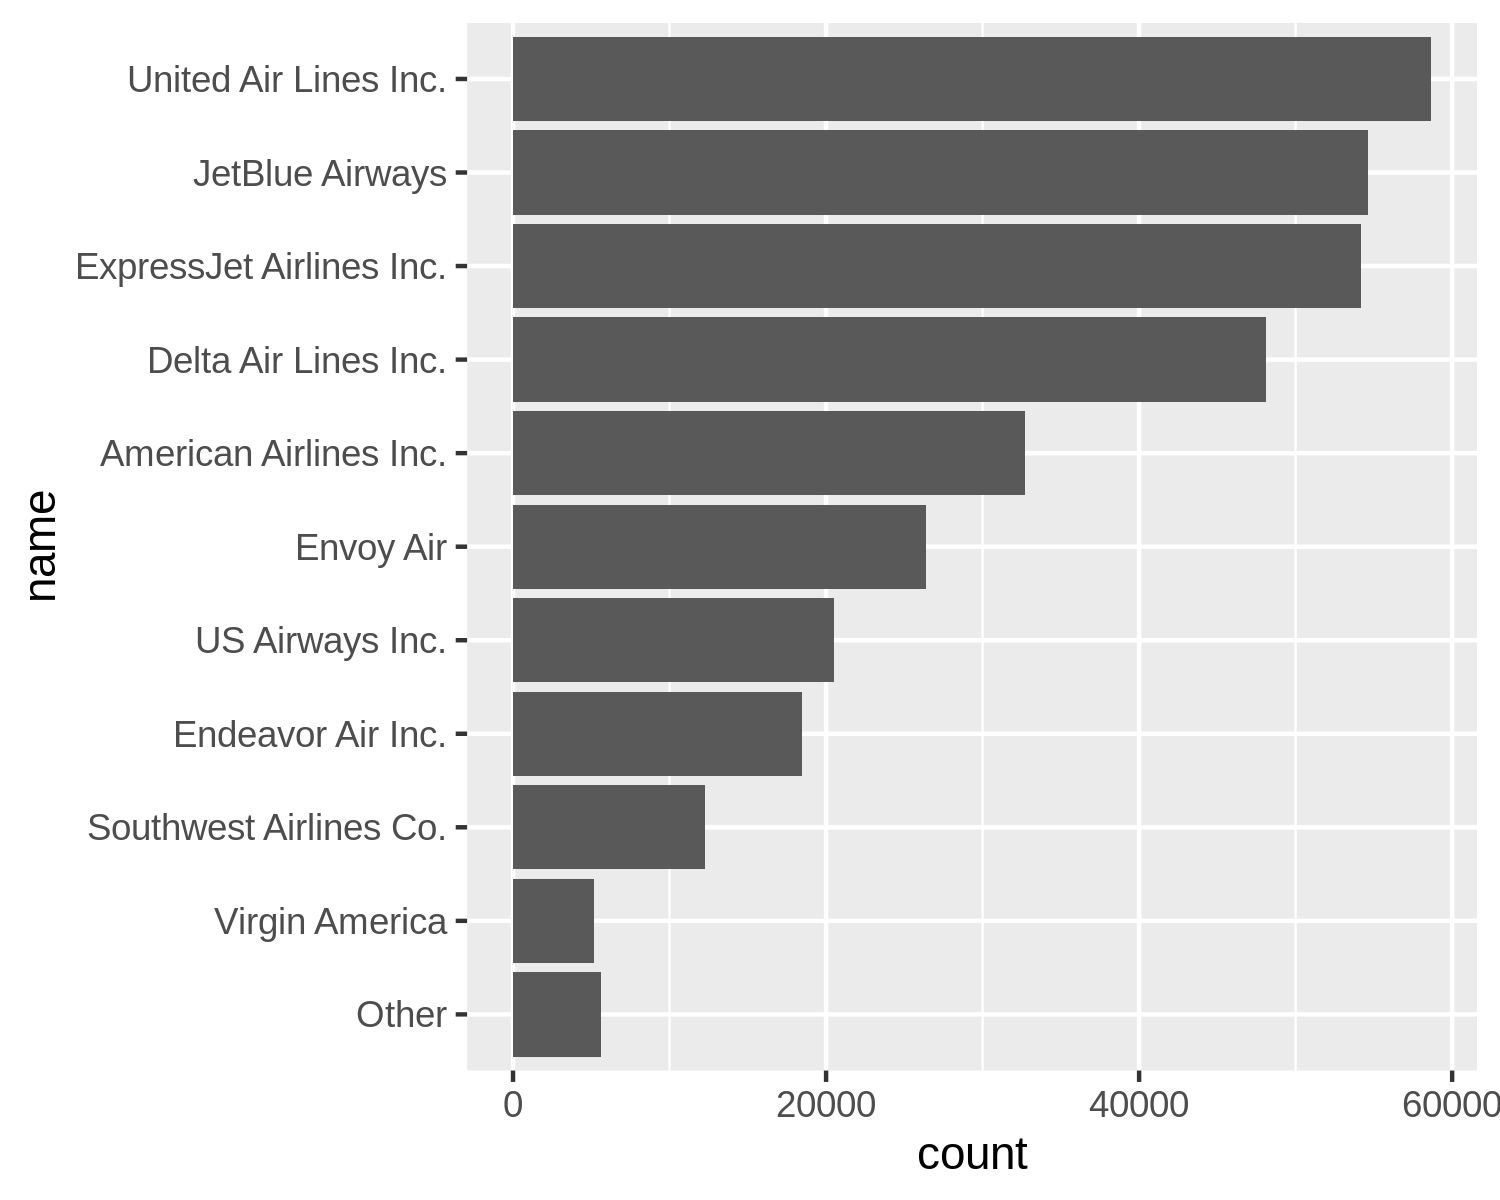

In [28]:
p = ggplot(df_flights_sorted, aes (y = name))

p = p + geom_bar()

p
